# Analysis of same data set as anslynwines but using KMeans Clustering

In [1]:
import pandas as pd
import numpy as np

In [2]:
awines = pd.read_csv("5wines0720.csv", encoding="utf-8")

In [3]:
len(awines)

80

Removing other Zinfandel wines, retaining only one.

In [4]:
awines = awines.iloc[0:48 , :]

In [5]:
data = np.array(awines.iloc[: , 1:])

In [6]:
from sklearn.decomposition import PCA

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
target = awines["Unnamed: 0"]

In [9]:
target = np.array(target)

In [10]:
target

array([u'Beaujolais', u'Beaujolais', u'Beaujolais', u'Beaujolais',
       u'Beaujolais', u'Beaujolais', u'Beaujolais', u'Beaujolais',
       u'Cabernet', u'Cabernet', u'Cabernet', u'Cabernet', u'Cabernet',
       u'Cabernet', u'Cabernet', u'Cabernet', u'Merlot', u'Merlot',
       u'Merlot', u'Merlot', u'Merlot', u'Merlot', u'Merlot', u'Merlot',
       u'Pinot Noir', u'Pinot Noir', u'Pinot Noir', u'Pinot Noir',
       u'Pinot Noir', u'Pinot Noir', u'Pinot Noir', u'Pinot Noir',
       u'Shiraz', u'Shiraz', u'Shiraz', u'Shiraz', u'Shiraz', u'Shiraz',
       u'Shiraz', u'Shiraz', u'Zinfandel BS', u'Zinfandel BS',
       u'Zinfandel BS', u'Zinfandel BS', u'Zinfandel BS', u'Zinfandel BS',
       u'Zinfandel BS', u'Zinfandel BS'], dtype=object)

In [11]:
from sklearn import preprocessing

In [12]:
target_le = preprocessing.LabelEncoder()

In [13]:
target = target_le.fit_transform(target)

In [14]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5])

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
np.random.seed(5)

In [17]:
from sklearn.cluster import KMeans

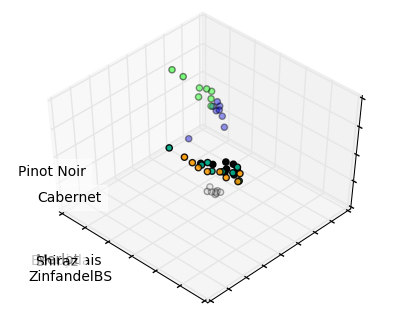

In [18]:
centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)
plt.cla()

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
data = kmeans.transform(data)

for name, label in [('Beaujolais', 0), ('Cabernet', 1), ('Merlot', 2), ('Pinot Noir', 3), ('Shiraz', 4), ('ZinfandelBS', 5)]:
    ax.text3D(data[target == label, 0].mean(),
             data[target == label, 1].mean() + .4,
             data[target == label, 2].mean(), name,
             horizontalalignment='center',
             bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
target_ = np.choose(target, [1,2,3,4,5,0]).astype(np.float)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=target, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [19]:
kmeans.labels_

array([3, 0, 0, 0, 3, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 3, 0, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [20]:
kmeans.cluster_centers_

array([[ 0.08126667,  0.08234167,  0.41179167,  0.43051667,  0.8305    ,
         0.83136667,  0.07734167,  0.08053333,  0.39888333,  0.41833333,
         0.79620833,  0.79794167,  0.26663333,  0.2666    ,  0.30606667,
         0.32106667,  0.10156667,  0.10261667],
       [ 0.06992667,  0.0696    ,  0.51378   ,  0.5093    ,  0.87092   ,
         0.85650667,  0.06800667,  0.06827333,  0.49827333,  0.49386   ,
         0.8356    ,  0.82227333,  0.25317333,  0.24589333,  0.39756   ,
         0.39790667,  0.10210667,  0.10370667],
       [ 0.07073333,  0.07257778,  0.48204444,  0.48772222,  0.82435556,
         0.80954444,  0.06777778,  0.06993333,  0.46753333,  0.47428889,
         0.79192222,  0.77862222,  0.24128889,  0.23726667,  0.36496667,
         0.37176667,  0.09743333,  0.10268889],
       [ 0.0816    ,  0.08161667,  0.4188    ,  0.42771667,  0.78868333,
         0.80126667,  0.07776667,  0.07999167,  0.40585833,  0.41510833,
         0.75789167,  0.77139167,  0.26638333,  0.266

In [21]:
kmeans.get_params

<bound method KMeans.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

Need to do gridsearchcv for optimal n_clusters.